In [38]:
import time
import random

from functools import lru_cache
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
def memo(f):
    cache = {}
    def inner(n):
        if n not in cache:
            cache[n] = f(n)
        return cache[n]
    return inner

In [17]:
def fib1(n):
    assert n >= 0
    return n if n < 2 else fib1(n - 1) + fib1(n - 2)

In [18]:
@memo
def fib2(n):
    assert n >= 0
    return n if n < 2 else fib2(n - 1) + fib2(n - 2)

In [19]:
@lru_cache(maxsize=None)
def fib3(n):
    assert n >= 0
    return n if n < 2 else fib3(n - 1) + fib3(n - 2)

In [20]:
def fib4(n):
    assert n >= 0
    f0, f1 = 0, 1
    for i in range(n - 1):
        f0, f1 = f1, f0 + f1
    return f1

In [21]:
def timed(f, *args, n_iter=100):
    acc = float("inf")
    for i in range(n_iter):
        t0 = time.perf_counter()
        f(*args)
        t1 = time.perf_counter()
        acc = min(acc, t1 - t0)
    return acc

In [29]:
print(timed(fib1, 15))
print(timed(fib2, 50))
print(timed(fib3, 50))
print(timed(fib4, 50))

0.0002712000000428816
1.9999998812636477e-07
9.999996564147295e-08
3.099999958067201e-06


In [30]:
def compare(fs, args):
    for f in fs:
        plt.plot(args, [timed(f, arg) for arg in args], label=f.__name__)
    plt.legend()
    plt.grid(True)

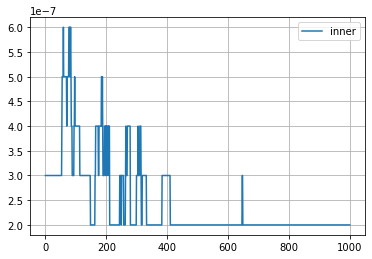

In [37]:
compare([fib2], list(range(0, 1000)))

**Now GCD**

In [39]:
def test_gcd(gcd, num_iter=100):
    for i in range(num_iter):
        c = random.randint(0, 1024)
        a = c * random.randint(0, 128)
        b = c * random.randint(0, 128)
        assert gcd(a, a) == gcd(a, 0) == a
        assert gcd(b, b) == gcd(b, 0) == b
        assert gcd(a, 1) == gcd(b, 1) == 1
        d = gcd(a, b)
        assert a % d == b % d == 0

In [46]:
def gcd_naive(a, b):
    assert a >= 0, b >= 0
    for d in reversed(range(max(a, b) + 1)):
        if d == 0 or a % d == b % d == 0:
            return d
        

In [50]:
test_gcd(gcd_naive)

In [54]:
def gcd_eu(a, b):
    assert a >= 0 and b>= 0
    while a and b:
        if a >= b:
            a %= b
        else:
            b %= a
    return max(a, b)

In [56]:
test_gcd(gcd_eu)

In [60]:
gcd_eu(12140214012041024, 24583475938475343)

1

In [58]:
def gcd_req(a, b):
    assert a >= 0 and b >= 0
    if a == 0 or b == 0:
        return max(a, b)
    elif a >= b:
        return gcd_req(a % b, b)
    else:
        return gcd_req(a, b % a)

In [59]:
test_gcd(gcd_req)

In [61]:
gcd_req(12140214012041024, 24583475938475343)

1

In [62]:
def gcd4(a, b):
    assert a >= 0 and b >= 0
    if a == 0 or b == 0:
        return max(a, b)
    return gcd4(b % a, a)

In [63]:
test_gcd(gcd4)

In [64]:
gcd4(12140214012041024, 24583475938475343)

1